![car](car.jpg)

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-15</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [69]:
# Import required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit
from statsmodels.graphics.mosaicplot import mosaic

# Start coding!

In [2]:
df_car_insurance = pd.read_csv(r'car_insurance.csv')
df_car_insurance.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [3]:
df_car_insurance.shape

(10000, 18)

In [4]:
df_car_insurance.isna().sum()

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64

In [5]:
df_car_insurance[df_car_insurance['credit_score'].isnull()]['income'].value_counts()

income
upper class      399
middle class     211
working class    190
poverty          182
Name: count, dtype: int64

In [6]:
df_car_insurance[df_car_insurance['credit_score'].isnull()]['education'].value_counts()

education
high school    396
university     382
none           204
Name: count, dtype: int64

In [7]:
df_car_insurance[df_car_insurance['credit_score'].isnull()]['vehicle_type'].value_counts()

vehicle_type
sedan         933
sports car     49
Name: count, dtype: int64

In [8]:
df_car_insurance['age'].value_counts()/df_car_insurance.shape[0]

age
1    0.3063
2    0.2931
0    0.2016
3    0.1990
Name: count, dtype: float64

In [9]:
df_car_insurance[df_car_insurance['credit_score'].isnull()]['age'].value_counts()/df_car_insurance['credit_score'].isnull().sum()

age
1    0.324847
2    0.292261
0    0.206721
3    0.176171
Name: count, dtype: float64

In [10]:
df_car_insurance.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [11]:
car_corr = df_car_insurance[['age', 'gender', 'credit_score', 'vehicle_ownership', 'married', 'children', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents', 'outcome']].corr()
df_car_insurance[['age', 'gender', 'credit_score', 'vehicle_ownership', 'married', 'children', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents', 'outcome']].corr()

,age,gender,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,duis,past_accidents,outcome
age,1.000000,0.005929,0.495495,0.272140,0.384759,0.383708,-0.278073,0.458413,0.281937,0.431061,-0.448463
gender,0.005929,1.000000,-0.081587,0.007385,0.008393,-0.002640,-0.015845,0.202095,0.094202,0.223202,0.107208
credit_score,0.495495,-0.081587,1.000000,0.312037,0.281238,0.220658,-0.174453,0.204542,0.127366,0.180978,-0.325286
vehicle_ownership,0.272140,0.007385,0.312037,1.000000,0.175626,0.125990,-0.097433,0.133868,0.086567,0.119521,-0.378921
married,0.384759,0.008393,0.281238,0.175626,1.000000,0.287009,-0.462193,0.218855,0.120840,0.215269,-0.262104
children,0.383708,-0.002640,0.220658,0.125990,0.287009,1.000000,-0.447655,0.220415,0.115354,0.206295,-0.232835
annual_mileage,-0.278073,-0.015845,-0.174453,-0.097433,-0.462193,-0.447655,1.000000,-0.323547,-0.116598,-0.195217,0.187154
speeding_violations,0.458413,0.202095,0.204542,0.133868,0.218855,0.220415,-0.323547,1.000000,0.359838,0.443074,-0.291862
duis,0.281937,0.094202,0.127366,0.086567,0.120840,0.115354,-0.116598,0.359838,1.000000,0.259359,-0.189352
past_accidents,0.431061,0.223202,0.180978,0.119521,0.215269,0.206295,-0.195217,0.443074,0.259359,1.000000,-0.311495


In [12]:
car_corr.min().min()

-0.4621930011051131

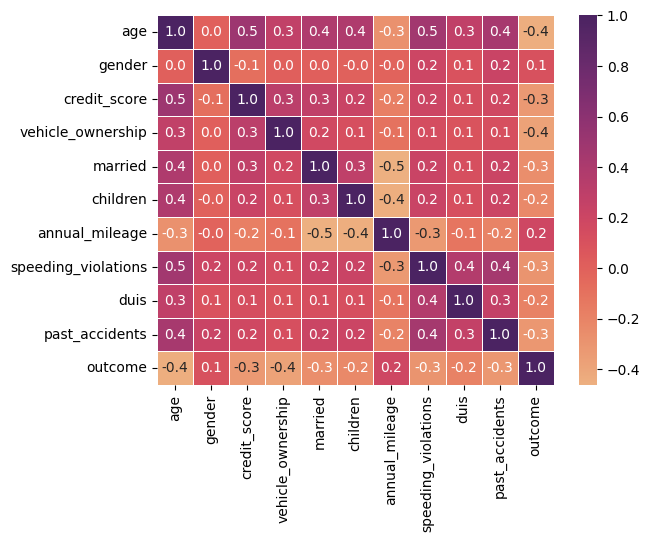

In [13]:
import seaborn as sns
sns.heatmap(
    car_corr
    , annot=True
    , fmt='.1f'
    , linewidths=0.5
    , cmap=sns.cm.flare
    # , vmin=car_corr.min().min()
    # , vmax=car_corr.max().max()
);

In [76]:
def logit_regplot(df:pd.DataFrame, x:str, y:str):
    mdl = logit(y+' ~ '+x, data=df).fit()
    sns.regplot(
        data=df
        , x=x
        , y=y
        , ci=None
        , logistic=True
    )
    # plt.axline(
    #     xy1=(0, mdl.params.iloc[0])
    #     , slope=mdl.params.iloc[1]
    #     , color='red'
    # )
    plt.show();
    print(df[x].value_counts(normalize=True).sort_index())
    np.round(mdl.predict())
    conf_matrix = mdl.pred_table()
    mosaic(conf_matrix);
    TN = conf_matrix[0,0]
    TP = conf_matrix[1,1]
    FN = conf_matrix[1,0]
    FP = conf_matrix[0,1]
    print( f'Model accuracy = {(TN+TP)/(TN+TP+FN+FP)*100}' )

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6


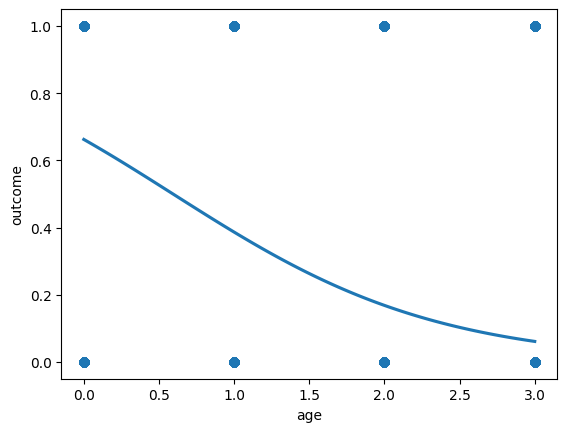

age
0    0.2016
1    0.3063
2    0.2931
3    0.1990
Name: proportion, dtype: float64
Model accuracy = 77.47


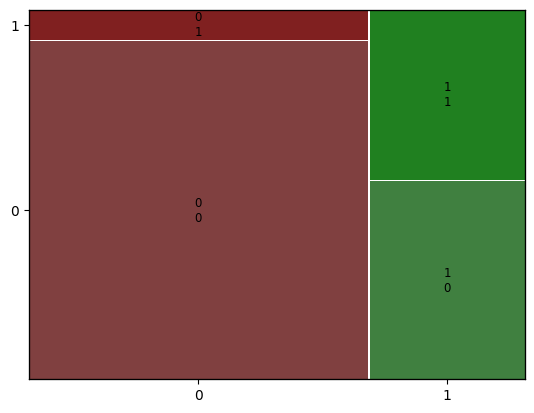

In [77]:
logit_regplot(df_car_insurance, 'age', 'outcome')

Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5


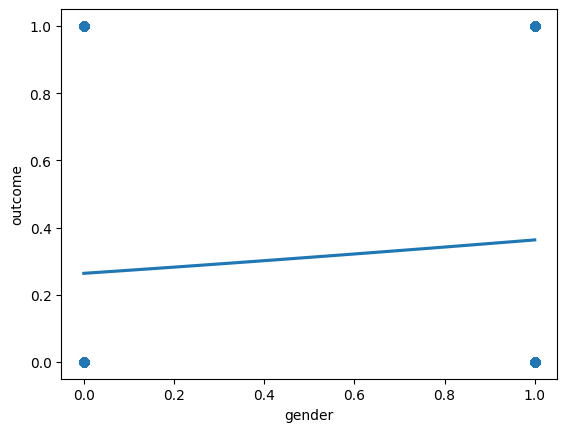

gender
0    0.501
1    0.499
Name: proportion, dtype: float64
Model accuracy = 68.67


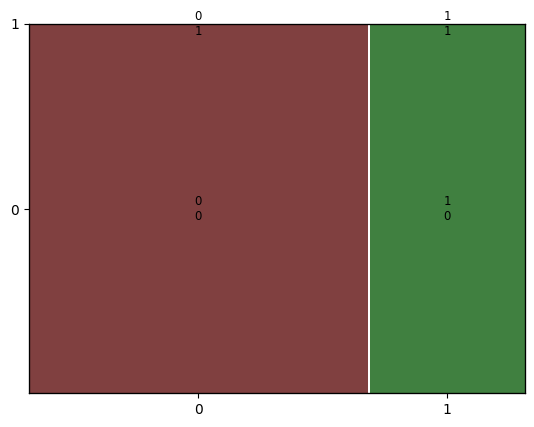

In [78]:
logit_regplot(df_car_insurance, 'gender', 'outcome')

Optimization terminated successfully.
         Current function value: 0.467390
         Iterations 7


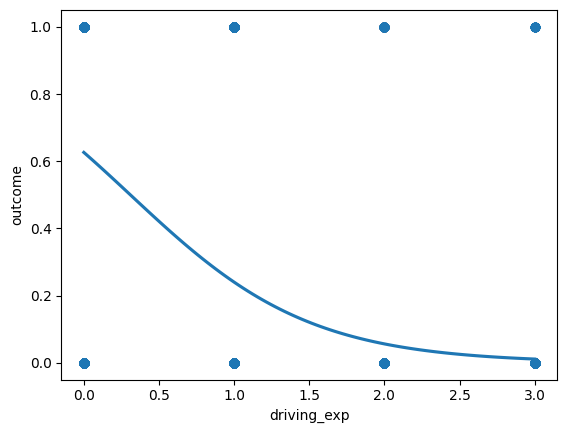

driving_exp
0    0.3530
1    0.3299
2    0.2119
3    0.1052
Name: proportion, dtype: float64
Model accuracy = 77.71000000000001


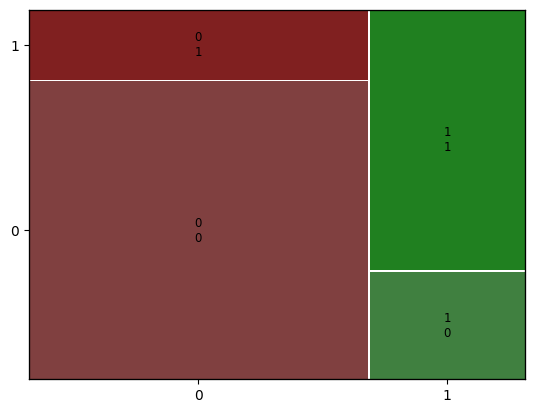

In [79]:
df_car_insurance['driving_exp'] = df_car_insurance['driving_experience'].replace({'0-9y':0, '10-19y':1, '20-29y':2, '30y+':3})
logit_regplot(df_car_insurance, 'driving_exp', 'outcome')

['high school' 'none' 'university']
Optimization terminated successfully.
         Current function value: 0.603848
         Iterations 5


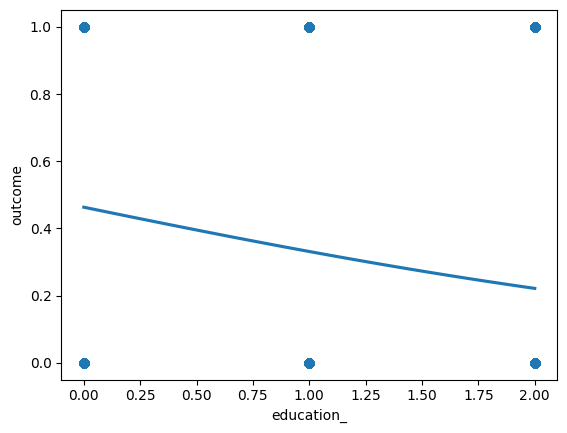

education_
0    0.1915
1    0.4157
2    0.3928
Name: proportion, dtype: float64
Model accuracy = 68.67


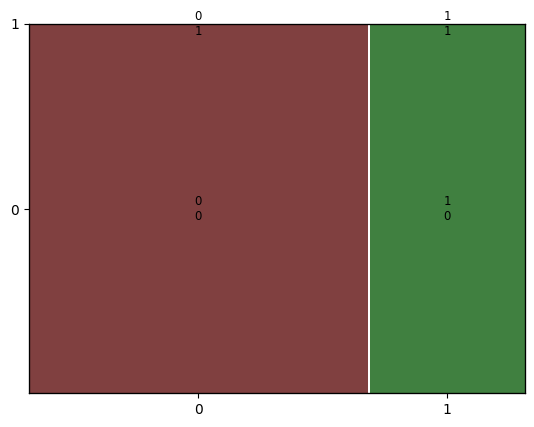

In [80]:
print(df_car_insurance['education'].unique())
df_car_insurance['education_'] = df_car_insurance['education'].replace({'none':0, 'high school':1, 'university':2})
logit_regplot(df_car_insurance, 'education_', 'outcome')

['upper class' 'poverty' 'working class' 'middle class']
Optimization terminated successfully.
         Current function value: 0.531580
         Iterations 5


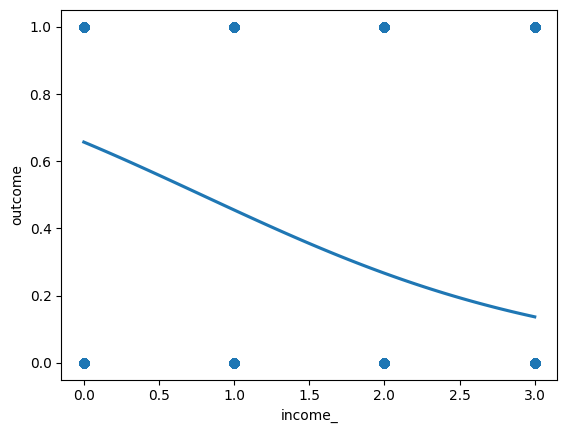

income_
0    0.1814
1    0.1712
2    0.2138
3    0.4336
Name: proportion, dtype: float64
Model accuracy = 74.25


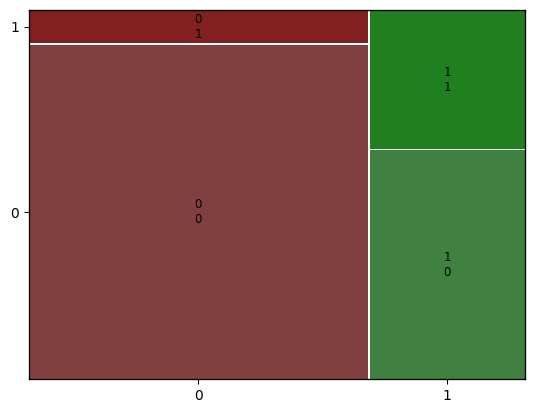

In [81]:
print(df_car_insurance['income'].unique())
df_car_insurance['income_'] = df_car_insurance['income'].replace({'poverty':0, 'working class':1, 'middle class':2, 'upper class':3})
logit_regplot(df_car_insurance, 'income_', 'outcome')

Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5


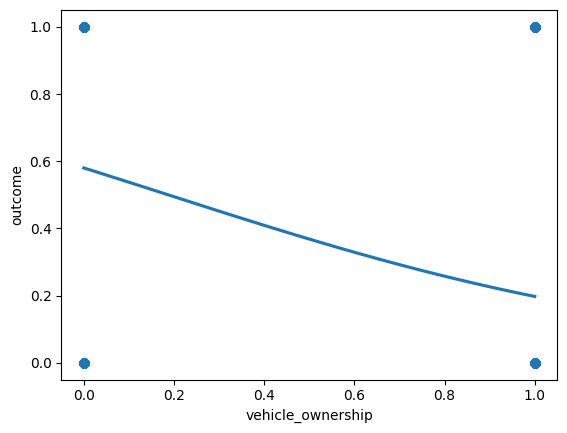

vehicle_ownership
0.0    0.303
1.0    0.697
Name: proportion, dtype: float64
Model accuracy = 73.50999999999999


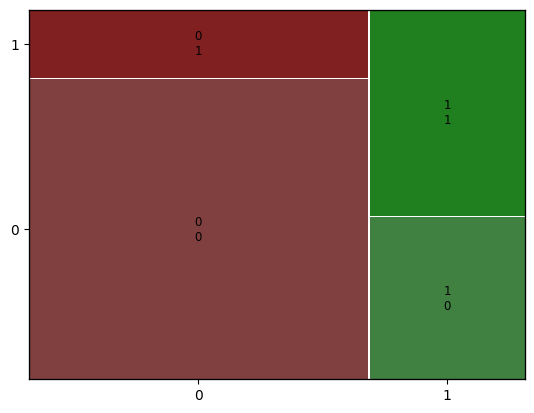

In [82]:
logit_regplot(df_car_insurance, 'vehicle_ownership', 'outcome')

['after 2015' 'before 2015']
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6


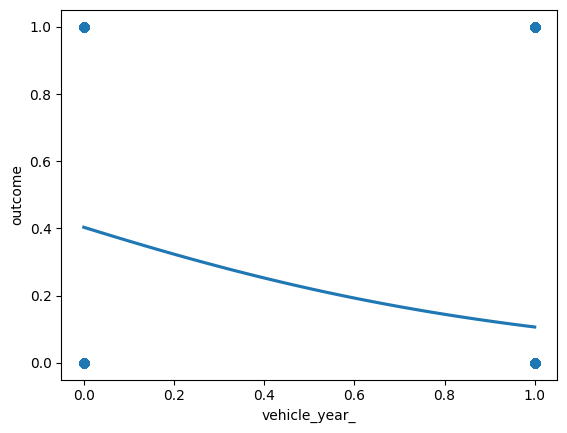

vehicle_year_
0    0.6967
1    0.3033
Name: proportion, dtype: float64
Model accuracy = 68.67


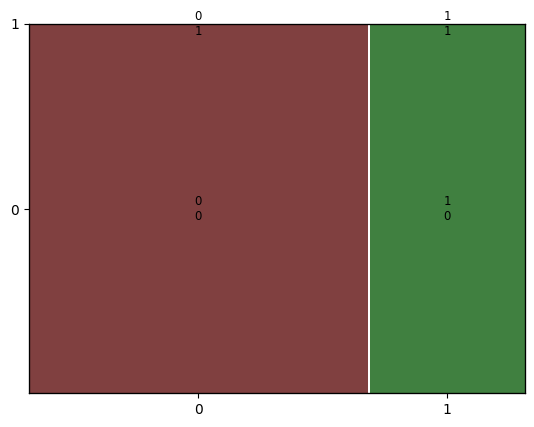

In [83]:
print(df_car_insurance['vehicle_year'].unique())
df_car_insurance['vehicle_year_'] = df_car_insurance['vehicle_year'].replace({'before 2015':0, 'after 2015':1})
logit_regplot(df_car_insurance, 'vehicle_year_', 'outcome')

Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5


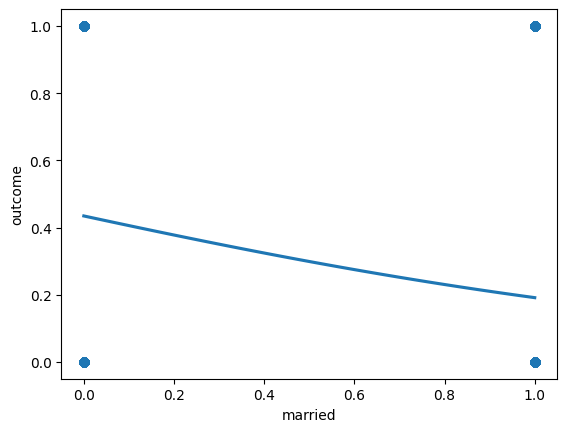

married
0.0    0.5018
1.0    0.4982
Name: proportion, dtype: float64
Model accuracy = 68.67


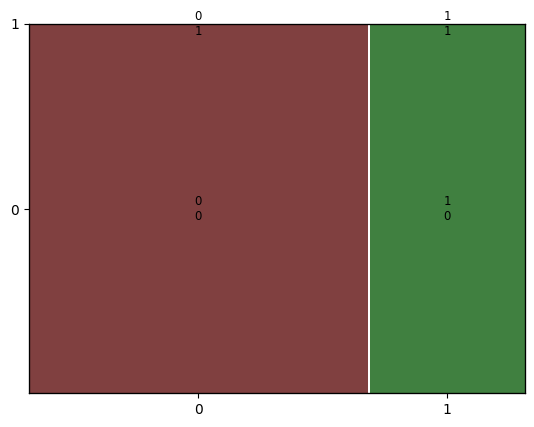

In [84]:
# print(df_car_insurance['vehicle_year'].unique())
# df_car_insurance['vehicle_year_'] = df_car_insurance['vehicle_year'].replace({'before 2015':0, 'after 2015':1})
logit_regplot(df_car_insurance, 'married', 'outcome')

Optimization terminated successfully.
         Current function value: 0.595431
         Iterations 5


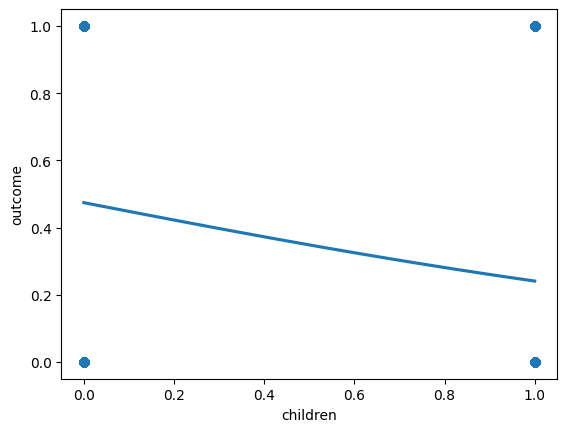

children
0.0    0.3112
1.0    0.6888
Name: proportion, dtype: float64
Model accuracy = 68.67


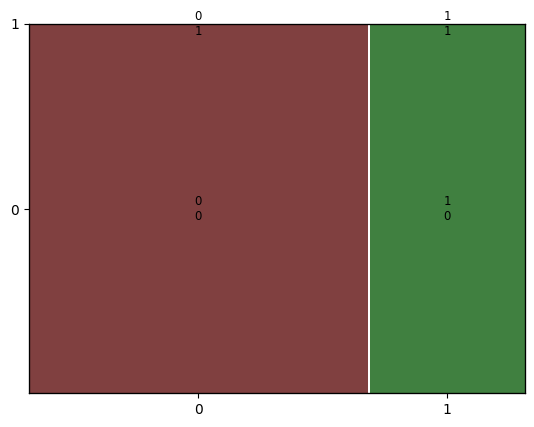

In [85]:
# print(df_car_insurance['vehicle_year'].unique())
# df_car_insurance['vehicle_year_'] = df_car_insurance['vehicle_year'].replace({'before 2015':0, 'after 2015':1})
logit_regplot(df_car_insurance, 'children', 'outcome')

['sedan' 'sports car']
Optimization terminated successfully.
         Current function value: 0.621700
         Iterations 5


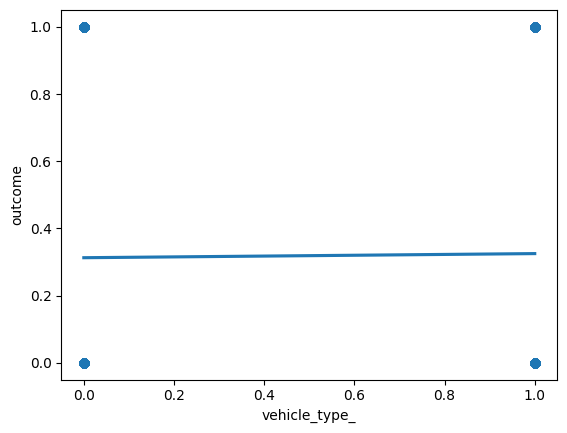

vehicle_type_
0    0.9523
1    0.0477
Name: proportion, dtype: float64
Model accuracy = 68.67


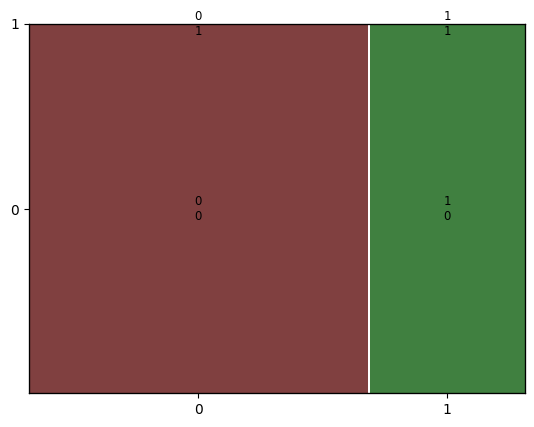

In [86]:
print(df_car_insurance['vehicle_type'].unique())
df_car_insurance['vehicle_type_'] = df_car_insurance['vehicle_type'].replace({'sedan':0, 'sports car':1})
logit_regplot(df_car_insurance, 'vehicle_type_', 'outcome')

Optimization terminated successfully.
         Current function value: 0.558922
         Iterations 7


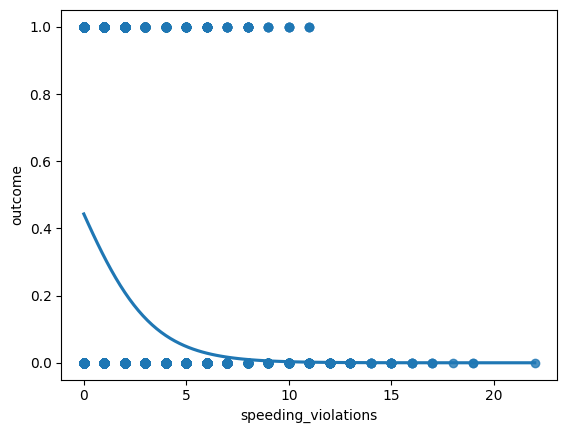

speeding_violations
0     0.5028
1     0.1544
2     0.1161
3     0.0830
4     0.0530
5     0.0319
6     0.0188
7     0.0140
8     0.0075
9     0.0049
10    0.0050
11    0.0030
12    0.0020
13    0.0012
14    0.0005
15    0.0008
16    0.0004
17    0.0003
18    0.0001
19    0.0002
22    0.0001
Name: proportion, dtype: float64
Model accuracy = 68.67


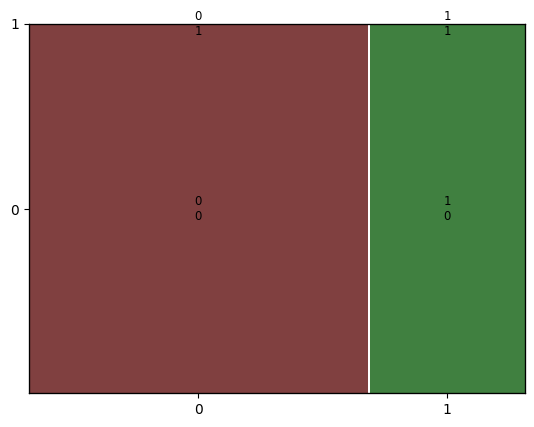

In [87]:
# print(df_car_insurance['speeding_violations'].unique())
# df_car_insurance['vehicle_type_'] = df_car_insurance['vehicle_type'].replace({'sedan':0, 'sports car':1})
logit_regplot(df_car_insurance, 'speeding_violations', 'outcome')

Optimization terminated successfully.
         Current function value: 0.598699
         Iterations 6


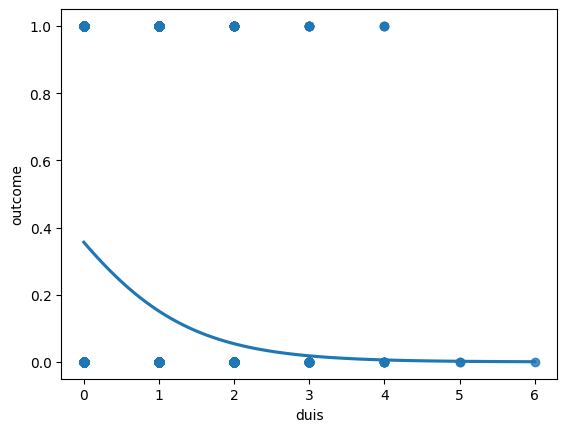

duis
0    0.8118
1    0.1470
2    0.0331
3    0.0068
4    0.0010
5    0.0002
6    0.0001
Name: proportion, dtype: float64
Model accuracy = 68.67


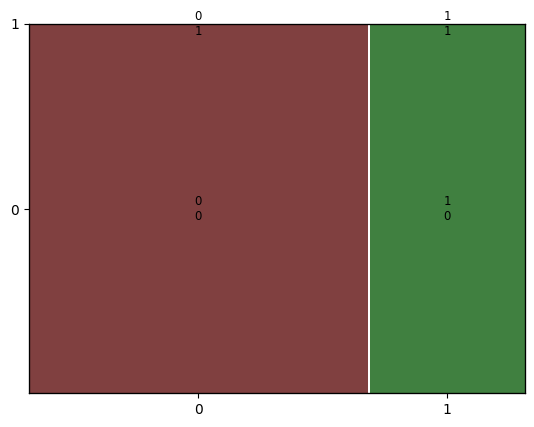

In [88]:
# print(df_car_insurance['speeding_violations'].unique())
# df_car_insurance['vehicle_type_'] = df_car_insurance['vehicle_type'].replace({'sedan':0, 'sports car':1})
logit_regplot(df_car_insurance, 'duis', 'outcome')

Optimization terminated successfully.
         Current function value: 0.549220
         Iterations 7


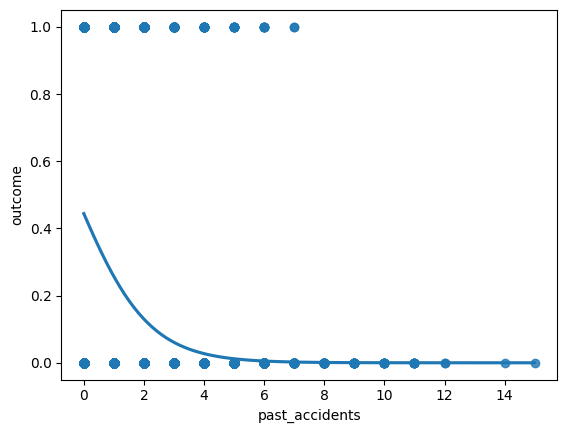

past_accidents
0     0.5584
1     0.1783
2     0.1104
3     0.0646
4     0.0366
5     0.0232
6     0.0144
7     0.0061
8     0.0041
9     0.0019
10    0.0009
11    0.0007
12    0.0002
14    0.0001
15    0.0001
Name: proportion, dtype: float64
Model accuracy = 68.67


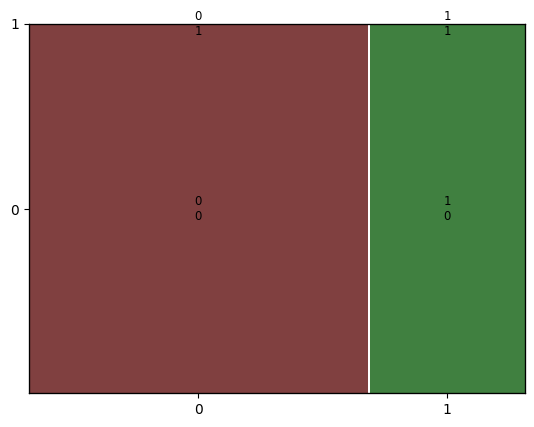

In [89]:
# print(df_car_insurance['speeding_violations'].unique())
# df_car_insurance['vehicle_type_'] = df_car_insurance['vehicle_type'].replace({'sedan':0, 'sports car':1})
logit_regplot(df_car_insurance, 'past_accidents', 'outcome')

In [90]:
df_car_insurance.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,...,vehicle_type,speeding_violations,duis,past_accidents,outcome,driving_exp,education_,income_,vehicle_year_,vehicle_type_
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,...,sedan,0,0,0,0.0,0,1,3,1,0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,...,sedan,0,0,0,1.0,0,0,0,0,0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,...,sedan,0,0,0,0.0,0,1,1,0,0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,...,sedan,0,0,0,0.0,0,2,1,0,0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,...,sedan,2,0,1,1.0,1,0,1,0,0


In [91]:
df_car_insurance.columns

Index(['id', 'age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome',
       'driving_exp', 'education_', 'income_', 'vehicle_year_',
       'vehicle_type_'],
      dtype='object')

In [93]:
df_car_insurance[['id', 'age', 'gender', 'driving_exp', 'education_', 'income_', 'credit_score', 'vehicle_ownership', 'vehicle_year_', 'married','children',
'postal_code', 'annual_mileage', 'vehicle_type_', 'speeding_violations', 'duis', 'past_accidents', 'outcome',]].head()

,id,age,gender,driving_exp,education_,income_,credit_score,vehicle_ownership,vehicle_year_,married,children,postal_code,annual_mileage,vehicle_type_,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0,1,3,0.629027,1.0,1,0.0,1.0,10238,12000.0,0,0,0,0,0.0
1,750365,0,1,0,0,0,0.357757,0.0,0,0.0,0.0,10238,16000.0,0,0,0,0,1.0
2,199901,0,0,0,1,1,0.493146,1.0,0,0.0,0.0,10238,11000.0,0,0,0,0,0.0
3,478866,0,1,0,2,1,0.206013,1.0,0,0.0,1.0,32765,11000.0,0,0,0,0,0.0
4,731664,1,1,1,0,1,0.388366,1.0,0,0.0,0.0,32765,12000.0,0,2,0,1,1.0


In [110]:
def mdl_accuracy(df:pd.DataFrame, x:str, y:str):
    mdl = logit(y+' ~ '+x, data=df).fit(disp=0)
    conf_matrix = mdl.pred_table()
    TN = conf_matrix[0,0]
    TP = conf_matrix[1,1]
    FN = conf_matrix[1,0]
    FP = conf_matrix[0,1]
    return f'{((TN+TP)/(TN+TP+FN+FP))*100:.2f}'

In [113]:
df_car_insurance[['id', 'age', 'gender', 'driving_exp', 'education_', 'income_', 'credit_score', 'vehicle_ownership', 'vehicle_year_', 'married','children',
'postal_code', 'annual_mileage', 'vehicle_type_', 'speeding_violations', 'duis', 'past_accidents', 'outcome',]].columns[1:-1]

Index(['age', 'gender', 'driving_exp', 'education_', 'income_', 'credit_score',
       'vehicle_ownership', 'vehicle_year_', 'married', 'children',
       'postal_code', 'annual_mileage', 'vehicle_type_', 'speeding_violations',
       'duis', 'past_accidents'],
      dtype='object')

In [123]:
for col in df_car_insurance.columns: #[1:-1]:
    if col!='id' and col!='outcome':
        print(col)
        # print(f'{col} vs outcome accuracy = {mdl_accuracy(df_car_insurance, col, "outcome")}')

age
gender
driving_experience
education
income
credit_score
vehicle_ownership
vehicle_year
married
children
postal_code
annual_mileage
vehicle_type
speeding_violations
duis
past_accidents
driving_exp
education_
income_
vehicle_year_
vehicle_type_
